In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df  = pd.read_csv("/content/drive/MyDrive/scikit-learn tutorial/data/creditcard.csv")[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [30]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

# 查看有哪些可以优化的参数
mod.get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 2},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score

def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

# 部分情况下是数值越小越好
# 使用 make_scorer 包装以确保指标的书写格式正确，允许被其他 scikit-learn 模块识别
make_scorer(min_recall_precision, greater_is_better=False)
# ?make_scorer

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

# 使用标准形式定义就可以不需要 make_scorer 包装
def min_recall_precision(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    # 记录三个维度的分数
    scoring={'precision': make_scorer(precision_score),
             'recall': make_scorer(recall_score),
             'min_both': min_recall_precision},
    # 针对其中一个分数进行最优模型选取
    refit='min_both',
    # 训练过程中的指标变化也返回
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

In [ ]:
s = make_scorer(min_recall_precision)
??s  # 查看 scorer 的标准形式

Here's a summary for the test metrics.

In [ ]:
import pandas as pd

# 返回最优的参数
print(grid.best_params_)
# 最优的模型
print(grid.best_estimator_)

# 训练情况grid.cv_results_
pd.DataFrame(grid.cv_results_)

{'class_weight': {0: 1, 1: np.float64(13.448275862068964)}}
LogisticRegression(class_weight={0: 1, 1: np.float64(13.448275862068964)},
                   max_iter=1000)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_both,split3_train_min_both,split4_train_min_both,split5_train_min_both,split6_train_min_both,split7_train_min_both,split8_train_min_both,split9_train_min_both,mean_train_min_both,std_train_min_both
0,0.572702,0.144652,0.034427,0.022650,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.632768,0.559322,0.573864,0.573864,0.562500,0.619318,0.625000,0.602273,0.611049,0.051750
1,0.363600,0.043523,0.020628,0.001126,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.441860,0.583333,1.000000,...,0.689266,0.627119,0.670455,0.647727,0.630682,0.681818,0.698864,0.687500,0.681366,0.053324
2,0.366325,0.023556,0.020435,0.003004,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.431818,0.583333,1.000000,...,0.734463,0.683616,0.715909,0.693182,0.681818,0.721591,0.744318,0.727273,0.723889,0.044372
3,0.375188,0.044855,0.024102,0.007544,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.431818,0.583333,1.000000,...,0.779661,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749413,0.039118
4,0.595814,0.089228,0.038552,0.010468,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.431818,0.583333,1.000000,...,0.819209,0.734463,0.761364,0.744318,0.732955,0.778409,0.784091,0.761364,0.770939,0.035655
5,0.511998,0.074234,0.029177,0.011610,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.431818,0.583333,1.000000,...,0.841808,0.774011,0.778409,0.789773,0.784091,0.789773,0.801136,0.772727,0.794190,0.029023
6,0.359626,0.033829,0.018421,0.000776,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.431818,0.583333,1.000000,...,0.847458,0.790960,0.795455,0.808989,0.795455,0.801136,0.805556,0.795455,0.810148,0.022218
7,0.349113,0.020577,0.019257,0.002542,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.431818,0.583333,1.000000,...,0.842697,0.805556,0.802198,0.806630,0.798883,0.812500,0.806630,0.804469,0.814279,0.018862
8,0.351571,0.029853,0.018849,0.001146,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",1.000000,0.422222,0.583333,0.947368,...,0.842697,0.807692,0.805405,0.812155,0.800000,0.806630,0.807487,0.807692,0.816528,0.019387
9,0.346725,0.029212,0.019253,0.001608,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.422222,0.583333,0.947368,...,0.837989,0.808743,0.805405,0.813187,0.802198,0.812155,0.808511,0.809783,0.817216,0.018230


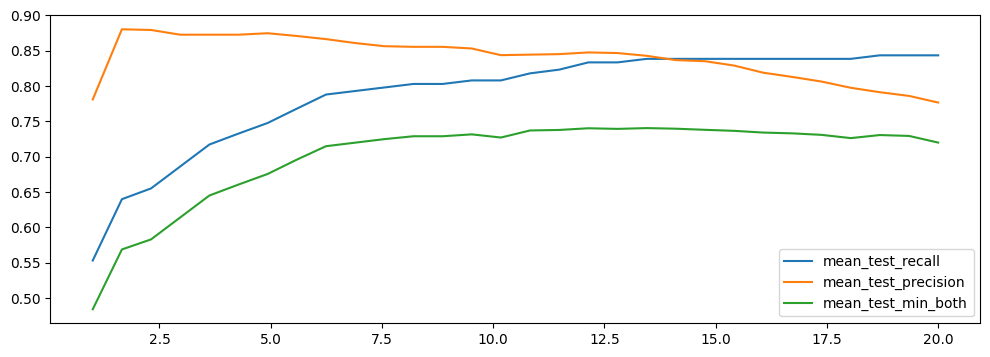

In [ ]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
             df_results[score],
             label=score)
plt.legend();

And here's the train metrics.

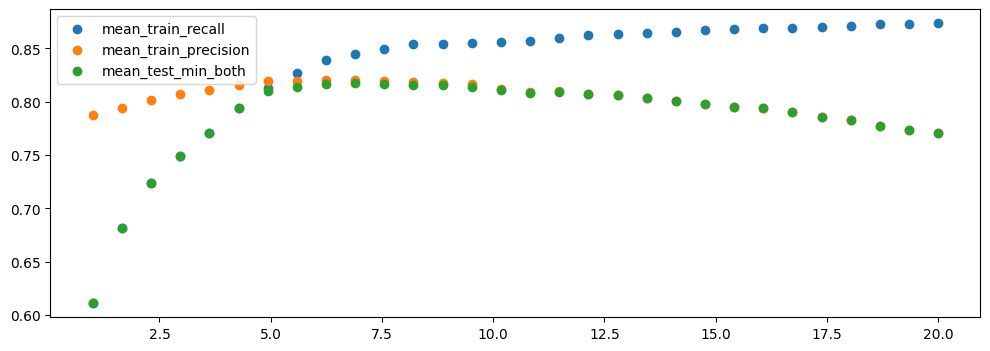

In [ ]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']],
                y=df_results[score.replace('test', 'train')],
                label=score)
plt.legend();

# Using Outlier Detection Models

In [ ]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
# 如果满足返回 1， 不满足为 0
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

And now in a gridsearch.

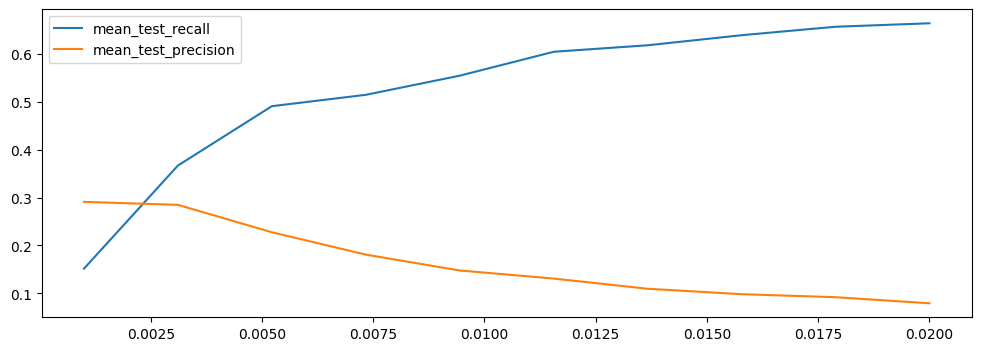

In [ ]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision,
             'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y);

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'],
             df_results[score],
             label=score)
plt.legend();

In [ ]:
df = pd.DataFrame(grid.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_contamination,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,1.236538,0.023439,0.335619,0.016687,0.001000,{'contamination': 0.001},0.704545,0.000000,0.75000,0.000000,...,0.356579,1,0.424658,0.000000,0.333333,0.000000,0.0,0.151598,0.187902,10
1,1.499166,0.339625,0.481016,0.114708,0.003111,{'contamination': 0.003111111111111111},0.435294,0.259259,0.54717,0.000000,...,0.191758,2,0.506849,0.482759,0.644444,0.000000,0.2,0.366810,0.233457,9
2,1.791977,0.339420,0.420886,0.116706,0.005222,{'contamination': 0.005222222222222222},0.335664,0.175000,0.42500,0.063830,...,0.132870,3,0.657534,0.482759,0.755556,0.157895,0.4,0.490749,0.208342,8
3,1.211443,0.013353,0.334954,0.016290,0.007333,{'contamination': 0.007333333333333333},0.306748,0.155340,0.31250,0.037975,...,0.111545,4,0.684932,0.551724,0.777778,0.157895,0.4,0.514466,0.219101,7
4,1.189726,0.018993,0.329207,0.023161,0.009444,{'contamination': 0.009444444444444443},0.257642,0.094937,0.27972,0.031915,...,0.101121,5,0.808219,0.517241,0.888889,0.157895,0.4,0.554449,0.267859,6


In [ ]:
def min_pre_rec(y, y_true):
    return min(recall_score(y, y_true), precision_score(y, y_true))

In [ ]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == 1, 0, 1))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == 1, 0, 1))

In [ ]:
grid = GridSearchCV(
    estimator=LogisticRegression(class_weight=10),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 40, 30)]},
    scoring={'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'min_pre_rec': make_scorer(min_pre_rec)},
    refit='precision',
    cv = 10,
    n_jobs=-1
)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight=10), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: np.float64(1.0)},
                                          {0: 1,
                                           1: np.float64(2.344827586206897)},
                                          {0: 1,
                                           1: np.float64(3.689655172413793)},
                                          {0: 1,
                                           1: np.float64(5.0344827586206895)},
                                          {0: 1,
                                           1: np.float64(6.379310344827586)},
                                          {0: 1,
                                           1: np.float64(7.724137931034483)},
                                          {0: 1,
                                           1: np.float64(9.068965517241...
                                           1: np.float64(35.96551724137931)},
                                          {0: 1,
                                           1: np.float64(37.310344827586206)},
                                          {0: 1,
                                           1: np.float64(38.6551724137931)},
                                          {0: 1, 1: np.float64(40.0)}]},
             refit='precision',
             scoring={'min_pre_rec': make_scorer(min_pre_rec, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [ ]:
df = pd.DataFrame(grid.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_min_pre_rec,split4_test_min_pre_rec,split5_test_min_pre_rec,split6_test_min_pre_rec,split7_test_min_pre_rec,split8_test_min_pre_rec,split9_test_min_pre_rec,mean_test_min_pre_rec,std_test_min_pre_rec,rank_test_min_pre_rec
0,0.500781,0.080284,0.028367,0.011559,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.473684,0.35,0.85,0.90,0.45,0.00,0.4,0.483885,0.243144,30
1,0.369735,0.026017,0.022786,0.008177,"{0: 1, 1: 2.344827586206897}","{'class_weight': {0: 1, 1: 2.344827586206897}}",1.000000,0.441860,0.583333,1.000000,...,0.842105,0.40,0.85,0.95,0.50,0.25,0.6,0.583835,0.216982,27
2,0.373812,0.035322,0.019729,0.001321,"{0: 1, 1: 3.689655172413793}","{'class_weight': {0: 1, 1: 3.689655172413793}}",1.000000,0.431818,0.583333,1.000000,...,0.894737,0.45,0.85,0.95,0.50,0.30,0.7,0.644936,0.211811,22
3,0.395101,0.051409,0.019855,0.001659,"{0: 1, 1: 5.0344827586206895}","{'class_weight': {0: 1, 1: 5.0344827586206895}}",1.000000,0.431818,0.583333,1.000000,...,0.894737,0.45,0.85,0.95,0.55,0.35,0.8,0.675463,0.213976,18
4,0.357928,0.019862,0.024136,0.010983,"{0: 1, 1: 6.379310344827586}","{'class_weight': {0: 1, 1: 6.379310344827586}}",0.944444,0.422222,0.583333,0.947368,...,0.947368,0.50,0.85,1.00,0.70,0.50,0.8,0.719766,0.197099,11


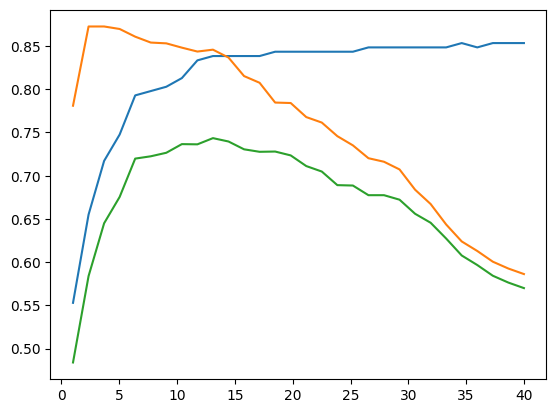

In [ ]:
df = pd.DataFrame(grid.cv_results_)
plt.plot([_[1] for _ in df['param_class_weight']], df['mean_test_recall'])
plt.plot([_[1] for _ in df['param_class_weight']], df['mean_test_precision'])
plt.plot([_[1] for _ in df['param_class_weight']], df['mean_test_min_pre_rec']);